# Assignment 1

## Exploring data in Python

For this assignment I have provided a portion of the data from the [Ingenium Canada Museum Collection](https://ingeniumcanada.org/centre/the-ingenium-research-institute) dataset. I've cleaned it up abit!

The assignment asks you to explore the data and provide some analysis and visualisations. It will mostly ask you to use approaches to data analysis and access that we have seen before, but also may involve doing a bit of further research into libraries like NumPy and MatplotLib.

Complete your answers in this Jupyter Notebook, highlighting which cell answers each question.

I have provided some code to load in and format the dataset, run this once at the beginning!

In [41]:
##Setup code to load in the dataset 
import numpy as np
file = open('data/museum_data_assignment-1.tsv')
dataset = np.loadtxt(file, delimiter = "\t",  dtype = 'O')
headings = dataset[0]
dataset = dataset[1:]
dataset = np.array([x for x in dataset if not x[2] == "Unknown"])
dataset[:,2] = [int(x) for x in dataset[:,2]]
dataset[:,6] = [float(x[:-2]) for x in dataset[:,6]]
dataset[:,7] = [float(x[:-2]) for x in dataset[:,7]]
dataset[:,8] = [float(x[:-2]) for x in dataset[:,8]]
dataset[:,5] = [x.replace(";","->").split("->")[0] for x in dataset[:,5]]
print("Column names\n")
print(headings)
print("\nDataset Shape\n")
print(dataset.shape)

Column names

['artifactNumber' 'ObjectName' 'BeginDate' 'group1' 'category1' 'material'
 'Length' 'Width' 'Height' 'image']

Dataset Shape

(6738, 10)


### Question 1

Using either ``sorted()`` or [`np.argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html?highlight=max#numpy.argmax), find and display the images for 

    - Oldest
    
    - Newest 
        
**You will have to do some extra research to find out how to display images in a Jupyter notebook**

In [42]:
from IPython.display import Image
# find the oldest museum in the dataset
oldest_museum = dataset[dataset[:,2].argmin()]
print("The oldest museum in the dataset is {} which was founded in {}".format(oldest_museum[1], oldest_museum[2]))
# display image of the oldest museum
display(Image(url=oldest_museum[-1]))

# find the newest museum in the dataset
newest_museum = dataset[dataset[:,2].argmax()]
print("The newest museum in the dataset is {} which was founded in {}".format(newest_museum[1], newest_museum[2]))
display(Image(url=newest_museum[-1]))

The oldest museum in the dataset is """Bob, plumb""" which was founded in 1101


The newest museum in the dataset is Laser optical block which was founded in 1990


### Question 2

Assuming the volume of an object is ``length x width x height``

1. Create a new 1-D array containing the volumes of each object 


2. Remove the **top and bottom 20%** (e.g. the biggest and smallest objects)


3. Plot a histogram of the remaining object's volumes. Label the axes appropriately.



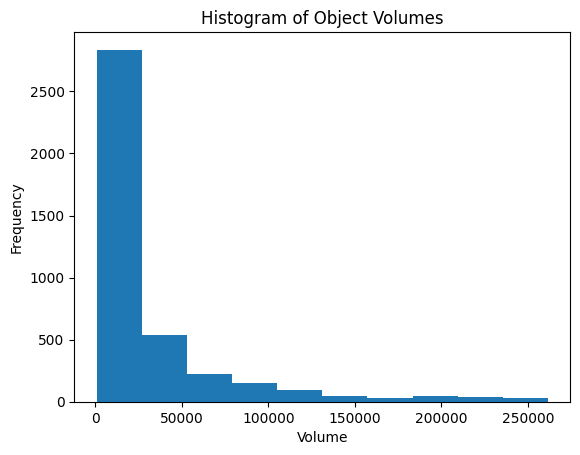

In [43]:

import matplotlib.pyplot as plt

volumes = dataset[:,6] * dataset[:,7] * dataset[:,8]
volumes = np.sort(volumes)
volumes = volumes[int(len(volumes)*0.2):int(len(volumes)*0.8)]

plt.hist(volumes, bins=10)
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.title("Histogram of Object Volumes")
plt.show()

### Question 3 

What is the most common category and group? What percentage of the total items to they each make up?

**HINT** What kind of ``Average`` is ``most common`` another word for?

In [44]:
# What is the most common category and group? What percentage of the total items to they each make up?
from collections import Counter
categories = dataset[:,3]
groups = dataset[:,4]
category_counts = Counter(categories)
group_counts = Counter(groups)

print("The most common category is {} with {} items which makes up {}% of the total items".format(category_counts.most_common(1)[0][0], category_counts.most_common(1)[0][1], round(category_counts.most_common(1)[0][1]/len(categories)*100, 2)))
print("The most common group is {} with {} items which makes up {}% of the total items".format(group_counts.most_common(1)[0][0], group_counts.most_common(1)[0][1], round(group_counts.most_common(1)[0][1]/len(groups)*100, 2)))

The most common category is Technology with 2914 items which makes up 43.25% of the total items
The most common group is Still cameras with 695 items which makes up 10.31% of the total items


### Question 4

1. Plot date of objects against width from everything added to the collection between 1850 and 1900. Pick sensible ticks and labels for the axes, as well as a sensible scale.

Each item on the plot should have a different colour or symbol depending on its material as described by the ``material`` heading .**EXTRA BONUS** If you can put in a legend mapping material to colour.

**HINT** Try using `NumPy Filters` and multiple calls to ``ax.plot()`` to plot each group.

2. Write a short paragraph describing what the plot tells us about the museums collection in relation to time, width and material. You can add some extra plots if you think it will help support any of your points. 


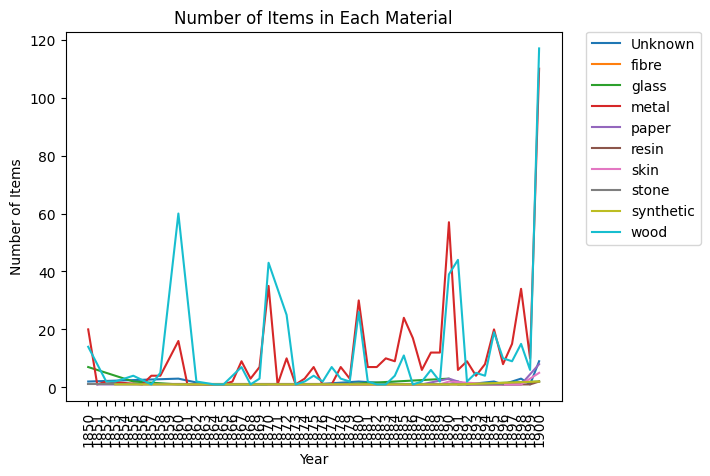

In [71]:
# plot line graph of the number of items in each category from 1850 to 1900

dataset = np.array([x for x in dataset if x[2] >= 1850 and x[2] <= 1900])

materials = dataset[:,5]
materials = np.unique(materials)

for material in materials:
    m_data = dataset[dataset[:,5] == material]
    
    # get the number of items in each year
    years = np.unique(m_data[:,2])
    year_counts = []
    for year in years:
        year_counts.append(len(m_data[m_data[:,2] == year]))

    plt.plot(years, year_counts, label=material)

plt.xticks(np.arange(1850, 1901, 1), rotation=90)
plt.xlabel("Year")
plt.ylabel("Number of Items")
plt.title("Number of Items in Each Material")
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

From 1980 to 1900, the number of museum collections showed an upward trend, with wood and metal collections accounting for the majority.